In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

%matplotlib inline

In [2]:
sc.settings.verbosity = 3           
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.24.3 scipy==1.11.3 pandas==2.0.3 scikit-learn==1.3.1 statsmodels==0.14.0 pynndescent==0.5.10


In [3]:
results_file = 'write/GSE214544_QC.h5ad'

In [4]:
Sample1_Pre = sc.read_10x_mtx('./Sample1_Pre/', cache = True, prefix = 'GSM6611295_P15306_5001_')
Sample1_Pre

... reading from cache file cache\Sample1_Pre-GSM6611295_P15306_5001_matrix.h5ad


C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2462 × 33538
    var: 'gene_ids', 'feature_types'

In [5]:
Sample1_Post = sc.read_10x_mtx('./Sample1_Post/', cache = True, prefix = 'GSM6611296_P15306_5002_')
Sample1_Post

... reading from cache file cache\Sample1_Post-GSM6611296_P15306_5002_matrix.h5ad


C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3070 × 33538
    var: 'gene_ids', 'feature_types'

In [6]:
Sample2_Pre = sc.read_10x_mtx('./Sample2_Pre/', cache = True, prefix = 'GSM6611297_P14601_4004_')
Sample2_Pre

... reading from cache file cache\Sample2_Pre-GSM6611297_P14601_4004_matrix.h5ad


C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 4777 × 33538
    var: 'gene_ids', 'feature_types'

In [7]:
Sample2_Post = sc.read_10x_mtx('./Sample2_Post/', cache = True, prefix = 'GSM6611298_P14601_4005_')
Sample2_Post

... reading from cache file cache\Sample2_Post-GSM6611298_P14601_4005_matrix.h5ad


C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1443 × 33538
    var: 'gene_ids', 'feature_types'

In [8]:
Sample3_Pre = sc.read_10x_mtx('./Sample3_Pre/', cache = True, prefix = 'GSM6611299_P15306_5003_')
Sample3_Pre

... reading from cache file cache\Sample3_Pre-GSM6611299_P15306_5003_matrix.h5ad


C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 15668 × 33538
    var: 'gene_ids', 'feature_types'

In [9]:
Sample3_Post = sc.read_10x_mtx('./Sample3_Post/', cache = True, prefix = 'GSM6611300_P15306_5004_')
Sample3_Post

... reading from cache file cache\Sample3_Post-GSM6611300_P15306_5004_matrix.h5ad


C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 9588 × 33538
    var: 'gene_ids', 'feature_types'

In [10]:
adatas = [Sample1_Pre, Sample1_Post, Sample2_Pre, Sample2_Post, Sample3_Pre, Sample3_Post]
adata = ad.concat(adatas, label = "sample")
adata

C:\Users\ana_emb\anaconda3\envs\Python_ex\lib\site-packages\anndata\_core\anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 37008 × 33538
    obs: 'sample'

In [11]:
adata.obs

,sample
AAACCCAAGCTTACGT-1,0
AAACGAAAGCAAATGT-1,0
AAACGAAGTGCCCACA-1,0
AAACGAATCGGTAGGA-1,0
AAACGAATCTCCTGAC-1,0
...,...
TTTGTTGGTGCCCACA-1,5
TTTGTTGGTTACCCTC-1,5
TTTGTTGGTTCGTAAC-1,5
TTTGTTGTCAAGTTGC-1,5


In [12]:
annotation_list = {
    '0':'Sample1_Pre',    
    '1':'Sample1_Post',
    '2':'Sample2_Pre',
    '3':'Sample2_Post',
    '4':'Sample3_Pre',
    '5':'Sample3_Post'
}

In [13]:
adata.obs['Sample'] = [annotation_list[clust] for clust in adata.obs['sample']]

In [14]:
adata.obs

,sample,Sample
AAACCCAAGCTTACGT-1,0,Sample1_Pre
AAACGAAAGCAAATGT-1,0,Sample1_Pre
AAACGAAGTGCCCACA-1,0,Sample1_Pre
AAACGAATCGGTAGGA-1,0,Sample1_Pre
AAACGAATCTCCTGAC-1,0,Sample1_Pre
...,...,...
TTTGTTGGTGCCCACA-1,5,Sample3_Post
TTTGTTGGTTACCCTC-1,5,Sample3_Post
TTTGTTGGTTCGTAAC-1,5,Sample3_Post
TTTGTTGTCAAGTTGC-1,5,Sample3_Post


In [15]:
adata.obs_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


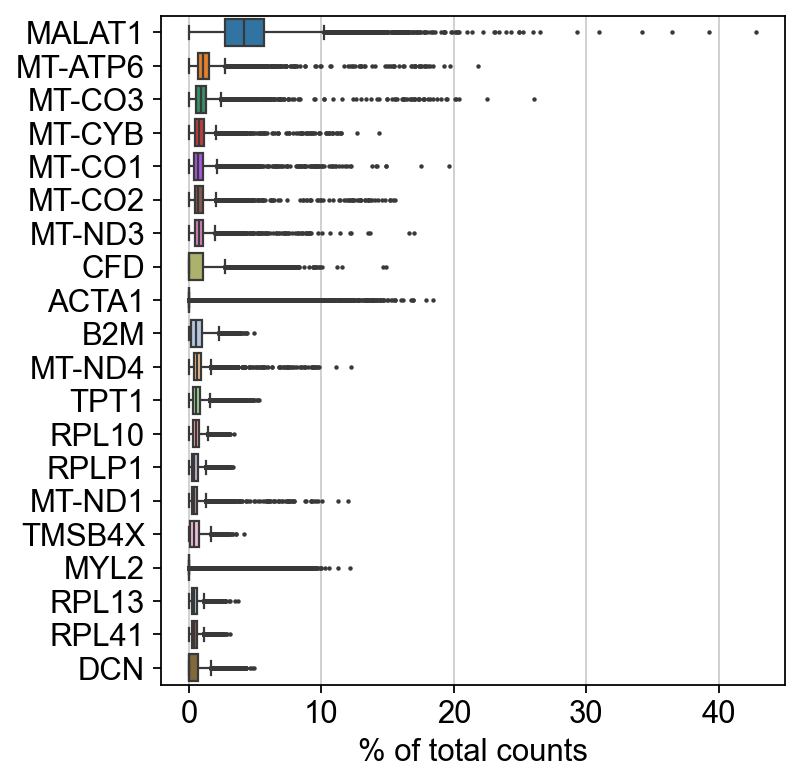

In [16]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [17]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 240 cells that have less than 200 genes expressed
filtered out 13597 genes that are detected in less than 3 cells


In [18]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

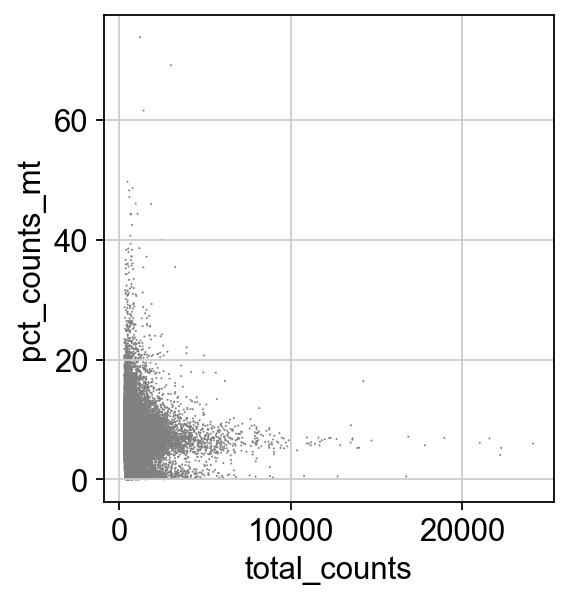

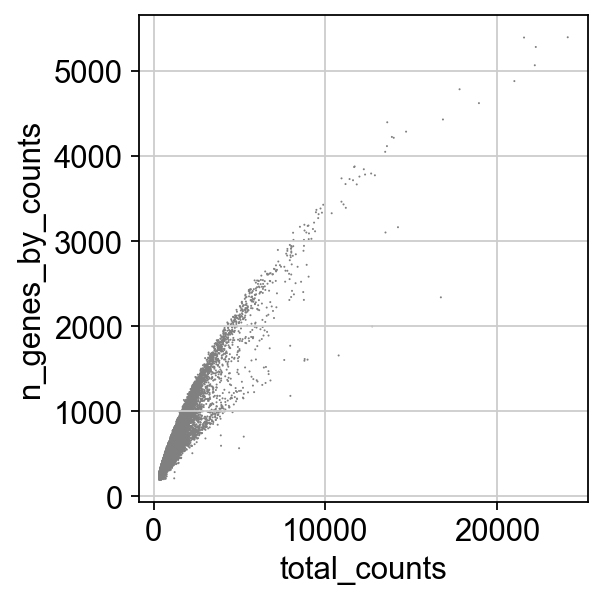

In [19]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 3500, :]
adata = adata[adata.obs.pct_counts_mt < 30, :]

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [22]:
sc.pp.log1p(adata)

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [24]:
adata.raw = adata

In [25]:
adata = adata[:, adata.var.highly_variable]

In [26]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:34)


In [27]:
sc.pp.scale(adata, max_value=10)

In [28]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


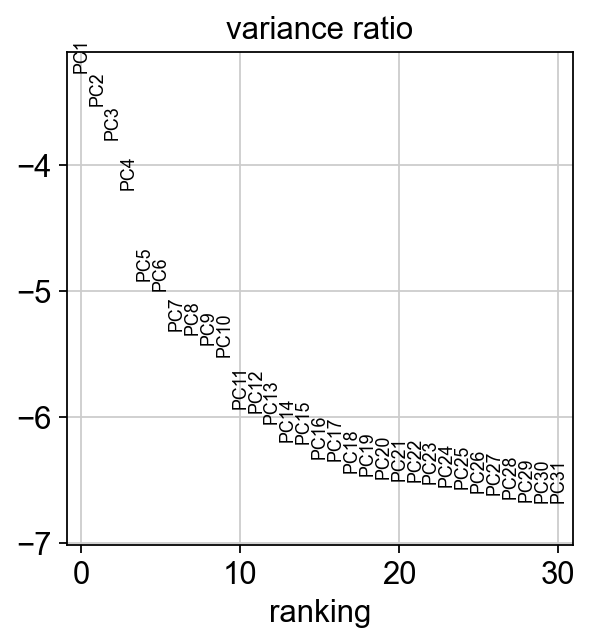

In [29]:
sc.pl.pca_variance_ratio(adata, log=True)

In [30]:
adata

AnnData object with n_obs × n_vars = 36682 × 1556
    obs: 'sample', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [31]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)


In [32]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


In [35]:
sc.tl.leiden(adata)

# found 23 clusters and added

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\ana_emb\AppData\Roaming\Python\Python39\site-packages\scanpy\tools\_rank_genes_groups.py:401: Performanc

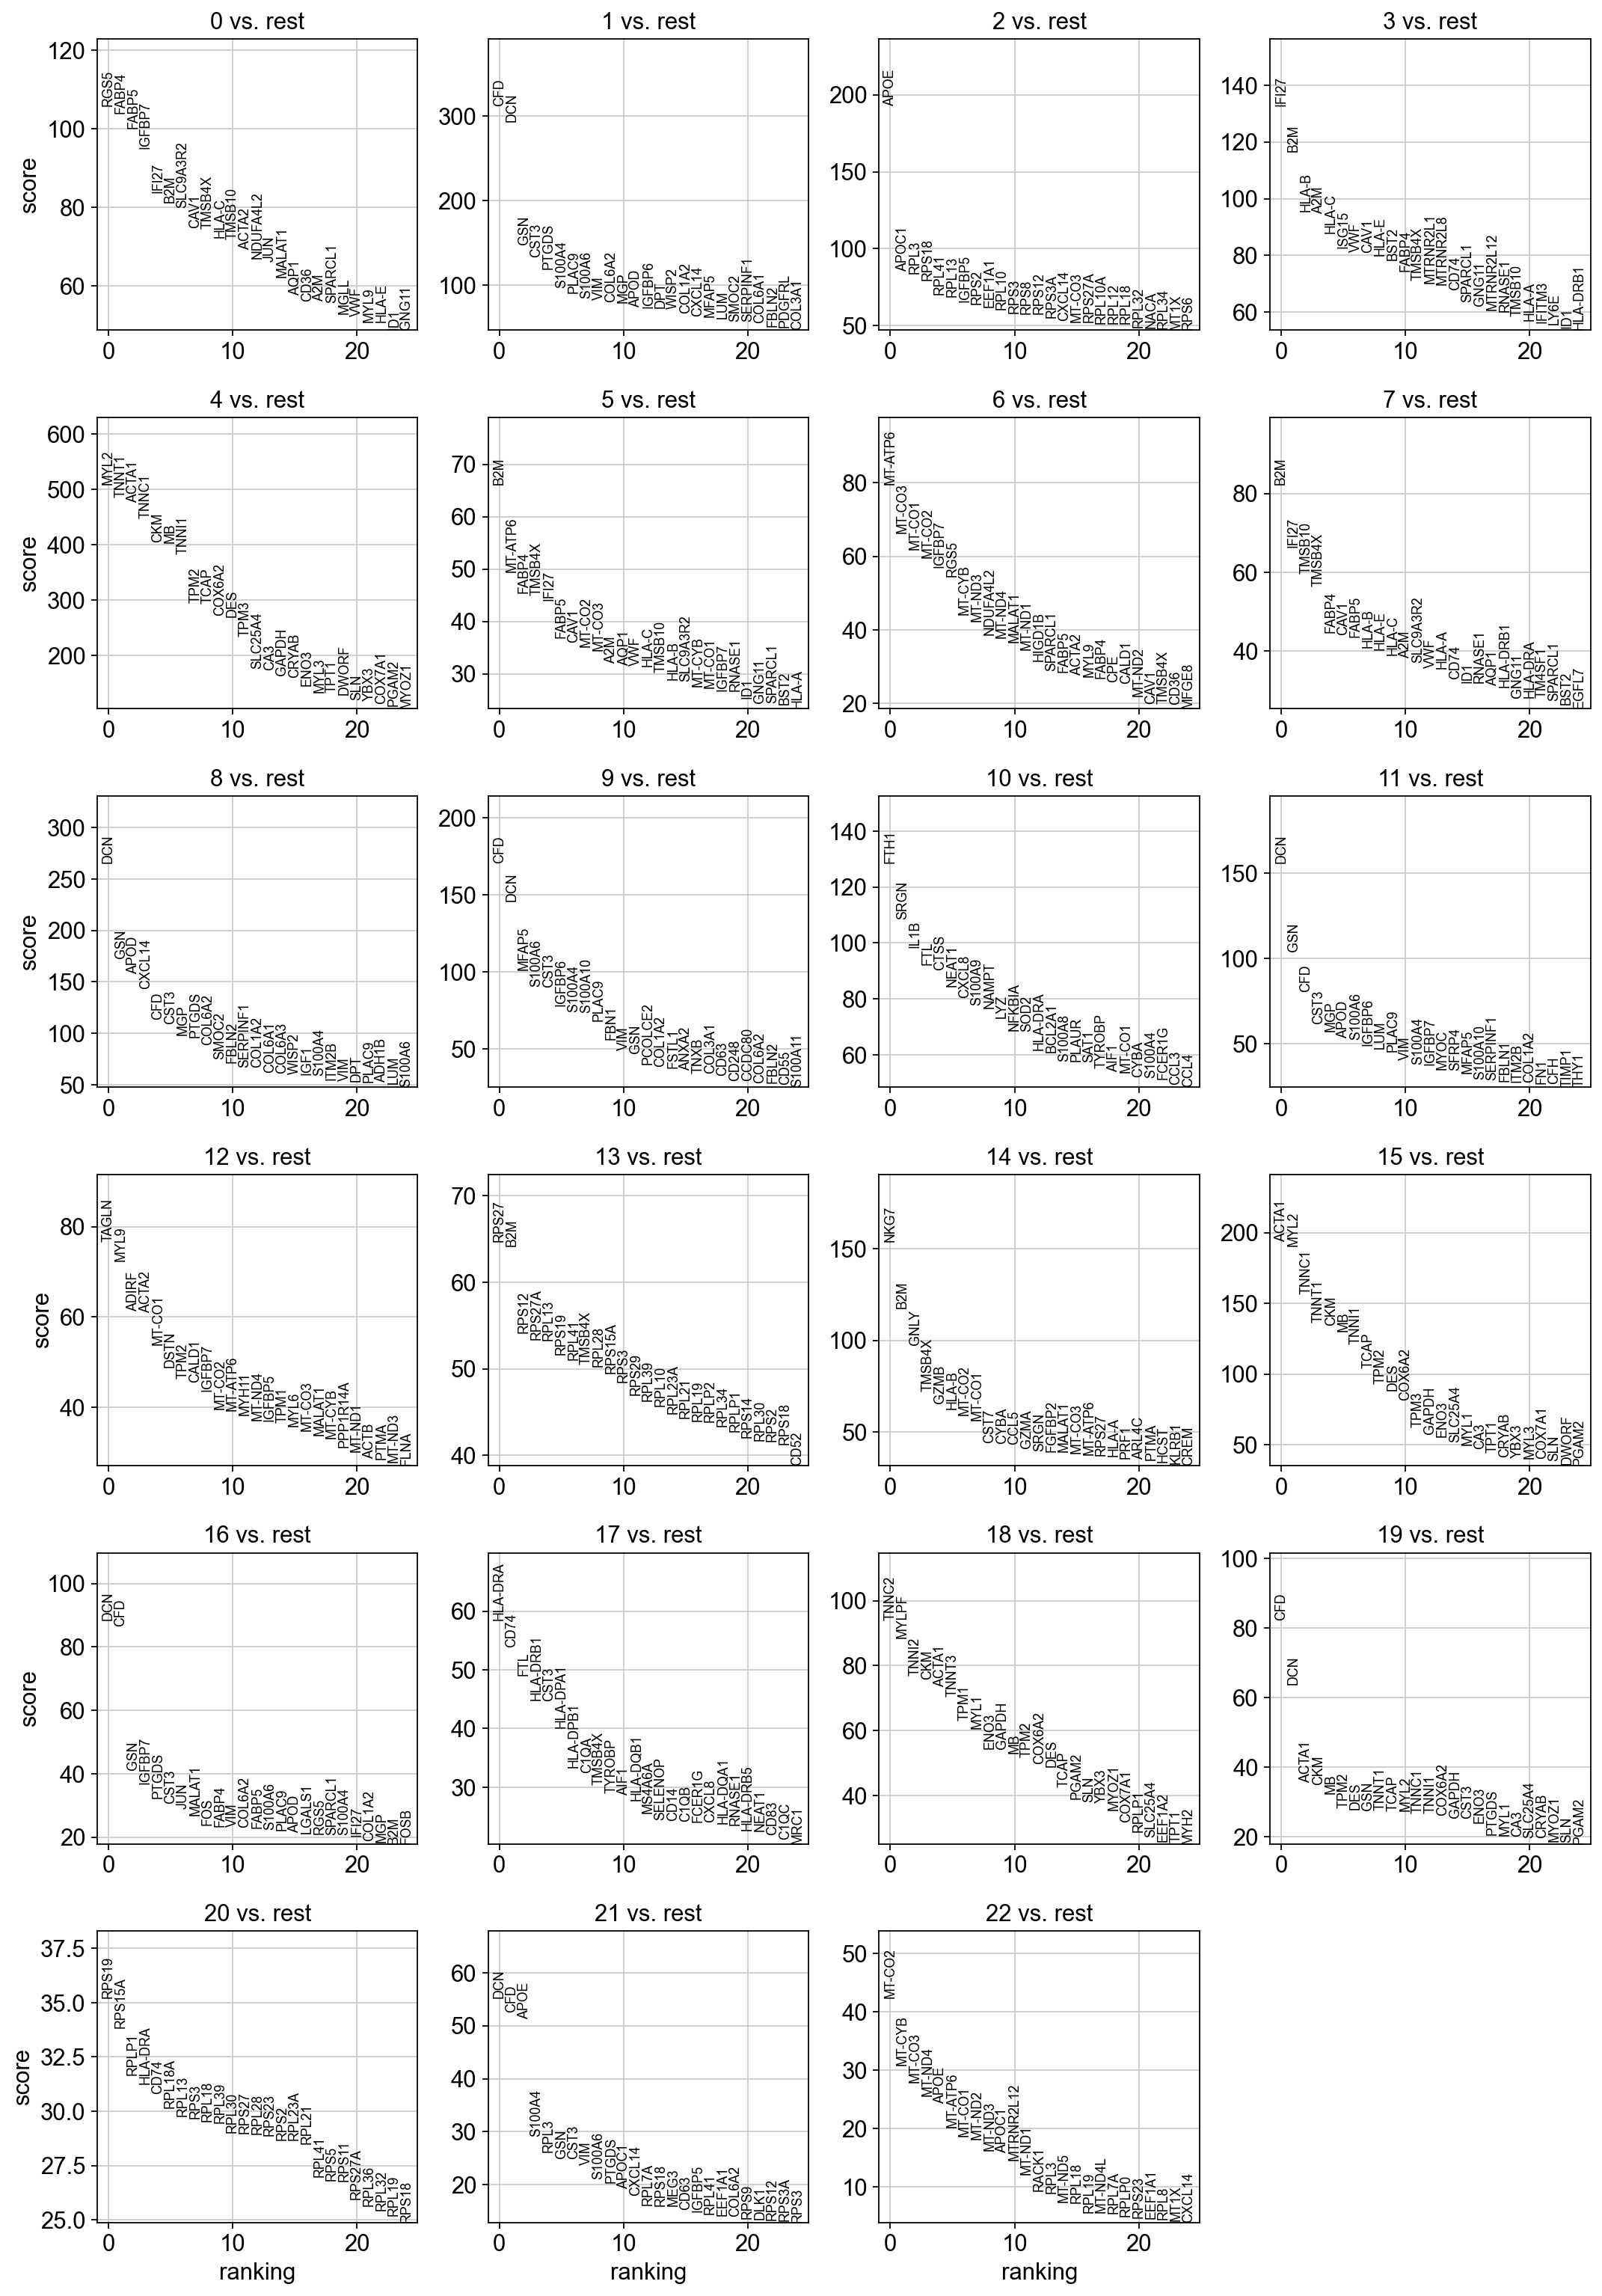

In [36]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [37]:
adata.write(results_file)